# A nice way to animate fucntions in jupyter notebooks

[ref](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/)

Thanks to the heavy recent development dedicated to Matplotlib and the Jupyter Notebook, , Matplotlib 1.5.1 supports inline display of animations with the to_html5_video method, which converts the animation to an h264 encoded video and embeddeds it directly in the notebook.

In [32]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

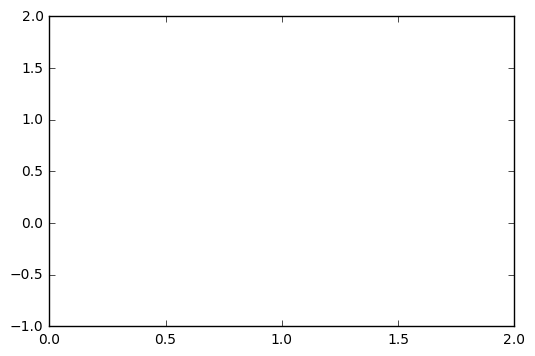

In [33]:
# first set up the figure, the axes and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim( 0, 2)
ax.set_ylim(-1, 2)

line, = ax.plot([],[], lw=2)

In [34]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [35]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [36]:
# call the animator. blit=True means: only re-daw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=100, interval=20, blit=True)

To show the animation, anim uses its conversion of the video to html5 using its method to_html5_video(), and the result is shown through the HTML() function.

In [37]:
# Show the animation.
HTML(anim.to_html5_video())

Note that Animation instances nowhave a _repr_html_ method. However, it returns None by default.

In [39]:
anim._repr_html_() is None

False

This means that we won't get any animation from the inline display.

In [41]:
anim

The method used to display is controlled by the animation.html `rc` parameter, which currently supports values of `None` and `html5`. `None` is the default, performing no display. We simply need to set it to `html5`:

In [42]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [43]:
anim

That 's all there is to it !